<a href="https://colab.research.google.com/github/nirmalaraj77/Python/blob/main/Exploratory_Data_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Import libraries and datasets

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

books = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_books.csv')
unemployment = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_unemployment.csv')
salaries = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_salaries1.csv')
divorce = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_divorce.csv')
planes = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_planes.csv')
housing = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_melb_data.csv')


# **Initial Exploration and Datatypes**
* .head
* .info
* .describe
* .value_counts
* .sns.histplot
* .sns.boxplot
* .dtypes
* .astype(data_type)
* .isin
* select_dtypes

In [ ]:
# Count the values associated with each continent in unemployment
print(unemployment["continent"].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


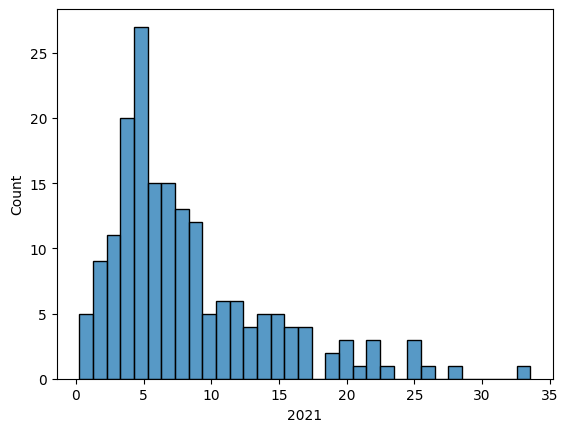

In [ ]:
# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x='2021', binwidth=1)
plt.show()

In [ ]:
# find datatype
print(books.dtypes)

# change datatype for year from float to whole number
books['year'] = books['year'].astype(int)
print(books.dtypes)

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object
name       object
author     object
rating    float64
year        int64
genre      object
dtype: object


In [ ]:
# Validate categorical data
books[books['genre'].isin(['Fiction', 'Non Fiction'])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


   rating  year
0     4.7  2016
1     4.6  2011
2     4.7  2018
3     4.7  2017
4     4.8  2019
2009
2019


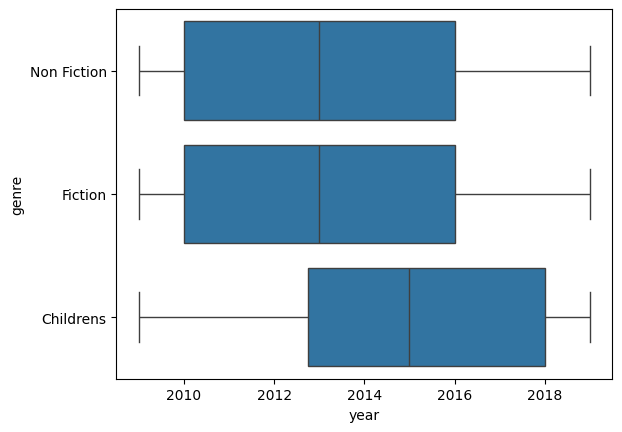

In [ ]:
# Validate numerical data - display all columns with number formats

print(books.select_dtypes('number').head())
print(books['year'].min())
print(books['year'].max())
sns.boxplot(data=books, x='year', y='genre')
plt.show()


In [ ]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

# **Data Summarization**

* .groupby
* .agg
* create dictionary (keys - columns and values - list of agg functions)
* create named tuples for named summary columns
* visualize with sns.barplot
* x / y = df.index to use index as x or y in a df
* sns.barplot() will automatically calculate the average of y with CI 95%

In [ ]:
# Group by a category
print(books.groupby('genre').min())

                                                          name  \
genre                                                            
Childrens    5,000 Awesome Facts (About Everything!) (Natio...   
Fiction                                      11/22/63: A Novel   
Non Fiction                      10-Day Green Smoothie Cleanse   

                       author  rating  year  
genre                                        
Childrens         Amy Shields     4.4  2009  
Fiction      Abraham Verghese     3.3  2009  
Non Fiction    Adam Gasiewski     4.0  2009  


In [ ]:
# Group by a category and column
print(books.groupby('genre')['rating'].mean())

genre
Childrens      4.780000
Fiction        4.570229
Non Fiction    4.598324
Name: rating, dtype: float64


In [ ]:
# Use aggregation
print(books.agg(['min', 'max']))

                                             name            author  rating  \
min                 10-Day Green Smoothie Cleanse  Abraham Verghese     3.3   
max  Wrecking Ball (Diary of a Wimpy Kid Book 14)      Zhi Gang Sha     4.9   

     year        genre  
min  2009    Childrens  
max  2019  Non Fiction  


In [ ]:
# Use dictionary to specify which agg functions to apply to which columns
# keys - columns to apply the aggregation
# value - list of specific agg function to apply to tyhat column

books.agg({'rating': ['mean', 'std'], 'year': ['min', 'max']})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [ ]:
# Use named summary columns to specify which agg functions to apply to which columns
# named tuple - column name and agg function
books.agg(mean_rating = ('rating', 'mean'),
          std_rating = ('rating', 'std'),
          median_year = ('year', 'median')
)

,rating,year
mean_rating,4.608571,NaN
std_rating,0.226941,NaN
median_year,NaN,2013.0


In [ ]:
# Chain groupby and agg - use dictionary to specify which agg functions to apply to which columns
books.groupby('genre').agg({'year': ['min', 'max']})

year      
              min   max
genre                  
Childrens    2009  2019
Fiction      2009  2019
Non Fiction  2009  2019

In [ ]:
# Chain groupby and agg - use named summary columns to specify which agg functions to apply to which columns
books.groupby('genre').agg(
    mean_rating=('rating', 'mean'),
    std_rating=('rating', 'std'),
    median_year=('year', 'median')
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


<ipython-input-30-00e270f1e81a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=books, x='genre', y='rating', palette='deep')


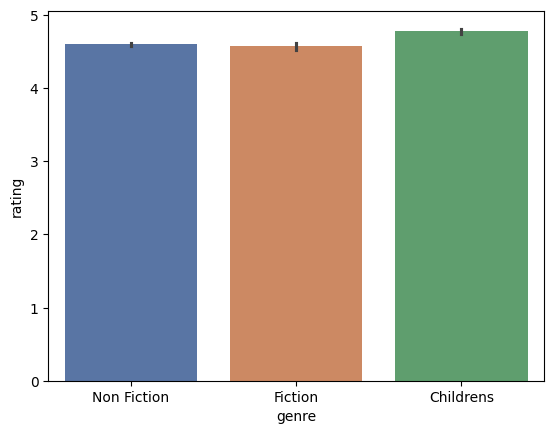

In [ ]:
# Visualize barplot grouped by genre
sns.barplot(data=books, x='genre', y='rating', palette='deep')
plt.show()

In [ ]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021', 'mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021', 'std')
)
print(continent_summary)


               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


<ipython-input-39-b0404aa6ca51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unemployment,x='continent', y = '2021', palette='deep')


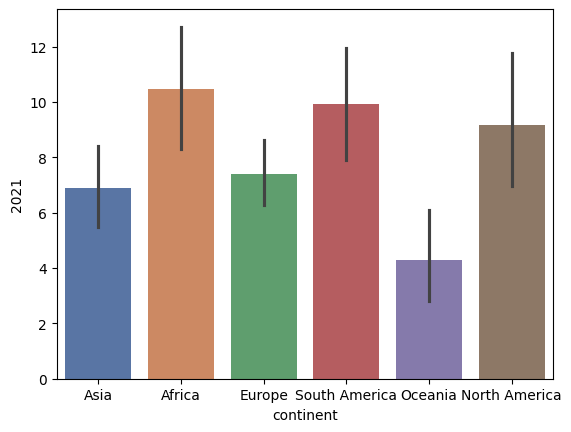

In [ ]:
# Create a bar plot of continents and their average unemployment
# sns.barplot calculates mean automatically
sns.barplot(data=unemployment,x='continent', y = '2021', palette='deep')
plt.show()

# **Missing Data**

* Affects distribution
* Less representative of the population
* Can result in drawing incorrect conclusions

## **Address Missing Data**
* Drop missing values - If 5% or less of total values
* Impute mean, median, mode - Depends on distribution and context
* Impute by subgroup (Different experience levels have different median salary)







In [2]:
# Check missing values
print(salaries.isna().sum())

Working_Year            12
Designation             27
Experience              33
Employment_Status       31
Employee_Location       28
Company_Size            40
Remote_Working_Ratio    24
Salary_USD              60
dtype: int64


In [3]:
# Set 5% threshold
threshold = len(salaries) * 0.05
print(threshold)

# Boolean indexing to filter columns less than or equal to threshold
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

# Drop missing values with dropna and subset with cols_to_drop
salaries.dropna(subset=cols_to_drop, inplace=True)

# Check missing values again
print(salaries.isna().sum())

30.35
Index(['Working_Year', 'Designation', 'Employee_Location',
       'Remote_Working_Ratio'],
      dtype='object')
Working_Year             0
Designation              0
Experience              16
Employment_Status       26
Employee_Location        0
Company_Size            14
Remote_Working_Ratio     0
Salary_USD              60
dtype: int64


In [4]:
# Filter remaining columns with missing values
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

# Impute mode summary statistic for first 3 columns with missing values indexing first item
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0], inplace=True)



Index(['Experience', 'Employment_Status', 'Company_Size', 'Salary_USD'], dtype='object')


<ipython-input-4-63c68b2e9b74>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salaries[col].fillna(salaries[col].mode()[0], inplace=True)


In [5]:
# Check missing values again
print(salaries.isna().sum())

# Impute median salary by experience level sub-group
## Group salaries by experience and calculate median
## .do_dict method
salaries_dict = salaries.groupby('Experience')['Salary_USD'].median().to_dict()
print(salaries_dict)

# Impute median salary by mapping dictionary to missing values with .map
salaries['Salary_USD'].fillna(salaries['Experience'].map(salaries_dict), inplace=True)

# Check missing values again
print(salaries.isna().sum())


Working_Year             0
Designation              0
Experience               0
Employment_Status        0
Employee_Location        0
Company_Size             0
Remote_Working_Ratio     0
Salary_USD              60
dtype: int64
{'Entry': 50008.0, 'Executive': 163694.5, 'Mid': 74979.0, 'Senior': 128903.0}
Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


<ipython-input-5-613cfa444f88>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salaries['Salary_USD'].fillna(salaries['Experience'].map(salaries_dict), inplace=True)


## **Missing Values in Planes database**

In [6]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset = cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


<ipython-input-7-8ff08e0ff7bc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=planes, x='Airline', y='Price', palette='deep')


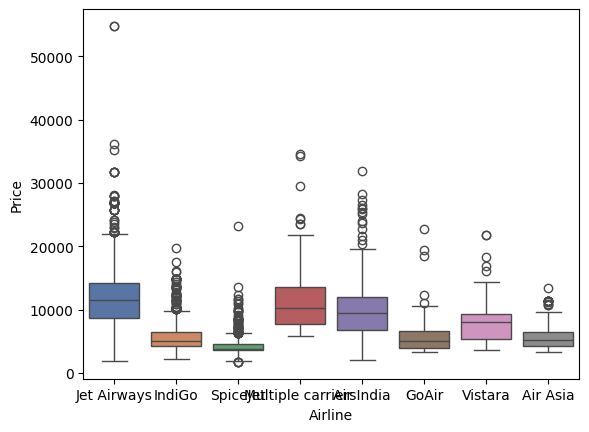

In [7]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price', palette='deep')
plt.show()

plt.show()

###**Remove the "Additional_Info" column and impute the median by "Airline" for missing values of "Price"**

In [8]:
# Remove 'Additional_Info' column
planes = planes.drop('Additional_Info', axis=1)

In [9]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


# **Converting and analyzing categorical data**

* select_dtypes
* .nunique
* df.columns

In [10]:
# Preview object datatype columns
print(salaries.select_dtypes('object').head())



                  Designation Experience Employment_Status Employee_Location  \
34               Data Analyst     Senior                FT                FR   
35              Data Engineer     Senior                FT                AT   
36    Data Science Consultant     Senior                FT                US   
37  Machine Learning Engineer     Senior                FT                US   
38               Data Analyst     Senior                FT                NG   

   Company_Size  
34            L  
35            L  
36            L  
37            L  
38            S  


In [23]:
# Count Designation
print(salaries['Designation'].value_counts())

# Print unique Designations
print(salaries['Designation'].unique())

# Count unique Designations
print(salaries['Designation'].nunique())

Designation
Data Scientist                              133
Data Engineer                               122
Data Analyst                                 87
Machine Learning Engineer                    37
Research Scientist                           13
Data Science Manager                         12
Data Architect                               11
Data Analytics Manager                        7
Principal Data Scientist                      7
Machine Learning Scientist                    6
Computer Vision Engineer                      6
Big Data Engineer                             5
Director of Data Science                      5
ML Engineer                                   5
AI Scientist                                  5
Data Science Consultant                       5
Head of Data                                  4
Data Engineering Manager                      4
Applied Data Scientist                        4
Applied Machine Learning Scientist            4
Head of Data Science        

In [12]:
# Search column for specific string with boolean result
print(salaries['Designation'].str.contains('Scientist'))

# Search column for multiple specific string | with boolean result
print(salaries['Designation'].str.contains('Machine Learning|AI'))

# Search column for specific string starting with a phrasse
print(salaries['Designation'].str.contains('^Data'))

34     False
35     False
36     False
37     False
38     False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 528, dtype: bool
34     False
35     False
36     False
37      True
38     False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 528, dtype: bool
34      True
35      True
36      True
37     False
38      True
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 528, dtype: bool


                  Designation      Job_Category
34               Data Analyst      Data Science
35              Data Engineer  Data Engineering
36    Data Science Consultant        Consultant
37  Machine Learning Engineer  Data Engineering
38               Data Analyst      Data Science


<ipython-input-52-d7c8684f0a39>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  my_plot = sns.countplot(data=salaries, x='Job_Category', palette='deep')
<ipython-input-52-d7c8684f0a39>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45,


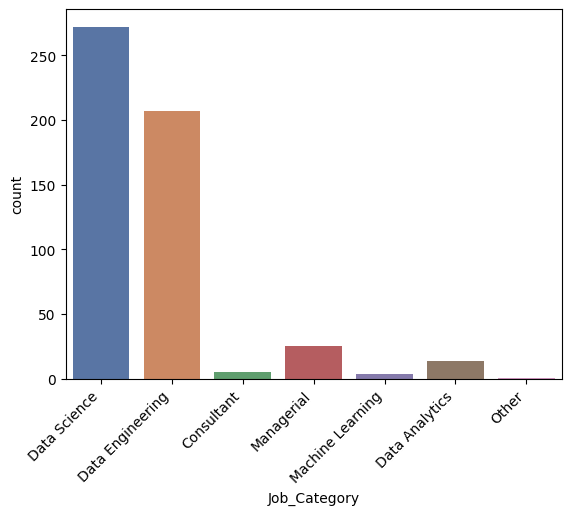

In [52]:
# Set categories based on strings

# Define list with different categories that will become values of new column
job_categories = ['Data Science', 'Data Analytics', 'Data Engineering', 'Machine Learning', 'Managerial', 'Consultant']

# Create variables containing filters
data_science = 'Data Analyst|NLP|Scientist'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure|Engineer'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

# Create a list with range of conditions for the string-dot-contains method
conditions = [
    salaries['Designation'].str.contains(data_science),
    salaries['Designation'].str.contains(data_analyst),
    salaries['Designation'].str.contains(data_engineer),
    salaries['Designation'].str.contains(ml_engineer),
    salaries['Designation'].str.contains(manager),
    salaries['Designation'].str.contains(consultant)
]

# Create Job_Categories coulmn in Salaries DataFrame using NumPy .select function
# It takes a list of conditions as the first argument
# Followed by a list of arrays to search for the conditions in
# By using an argument called default, we tell NumPy to assign "Other" when a value in our conditions list is not found
salaries['Job_Category'] = np.select(conditions, job_categories, default = 'Other')

# Preview Designation and Job_Category
print(salaries[['Designation', 'Job_Category']].head())

# Visualie Job-Category frequency
my_plot = sns.countplot(data=salaries, x='Job_Category', palette='deep')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
plt.show()

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
Number of unique values in Duration_Category column:  4


<ipython-input-58-f1b802aeaa87>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=planes, x="Duration_Category", palette='deep')


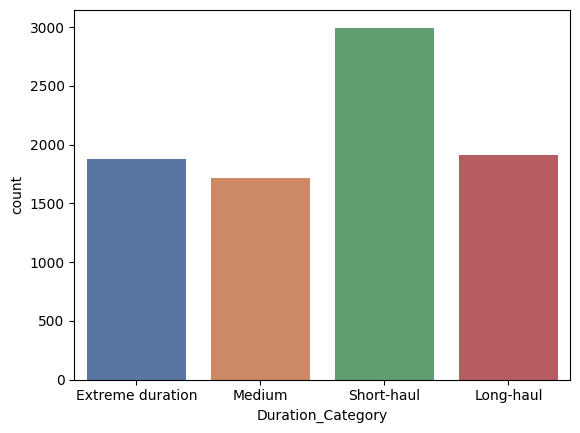

In [58]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for cols in non_numeric.columns:

  # Print the number of unique values
  print(f"Number of unique values in {cols} column: ", non_numeric[cols].nunique())


# Create a list of categories containing "Short-haul", "Medium", and "Long-haul"
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category", palette='deep')
plt.show()

# **Working with Numeric Data**

